In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix

# Importing the Dataset
Data was found on baseball savant, filtered by pitchers in the 2020 season

In [2]:
pitcher_data = pd.read_csv('Downloads/degrom_data.csv')

In [3]:
pitcher_data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2020-09-26,92.8,-1.03,5.53,Jacob deGrom,628450,594798,strikeout,swinging_strike,...,3,3,3,3,3,3,3,3,Strategic,Standard
1,FF,2020-09-26,99.3,-1.06,5.46,Jacob deGrom,628450,594798,NaN,foul,...,3,3,3,3,3,3,3,3,Strategic,Standard
2,CH,2020-09-26,92.2,-1.01,5.39,Jacob deGrom,628450,594798,NaN,foul,...,3,3,3,3,3,3,3,3,Strategic,Standard
3,CH,2020-09-26,89.8,-0.93,5.45,Jacob deGrom,628450,594798,NaN,ball,...,3,3,3,3,3,3,3,3,Strategic,Standard
4,CH,2020-09-26,91.8,-0.97,5.37,Jacob deGrom,628450,594798,NaN,foul,...,3,3,3,3,3,3,3,3,Strategic,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,FF,2020-07-24,99.7,-1.08,5.53,Jacob deGrom,660670,594798,NaN,ball,...,0,0,0,0,0,0,0,0,Standard,Standard
1131,FF,2020-07-24,99.0,-1.22,5.51,Jacob deGrom,660670,594798,NaN,foul,...,0,0,0,0,0,0,0,0,Standard,Standard
1132,FF,2020-07-24,99.2,-1.15,5.50,Jacob deGrom,660670,594798,NaN,ball,...,0,0,0,0,0,0,0,0,Standard,Standard
1133,FF,2020-07-24,99.1,-1.23,5.48,Jacob deGrom,660670,594798,NaN,swinging_strike,...,0,0,0,0,0,0,0,0,Standard,Standard


### Pie Chart Showing Percentage of Each Pitch Thrown

([<matplotlib.patches.Wedge at 0x7f8b7591c880>,
 [Text(0.1743329480840576, 1.0860976121934536, '4-Seam Fastball'),
  Text(-1.0751109920408635, -0.23267220459889654, 'Changeup'),
  Text(-0.7443020670389453, -0.8099471791429079, 'Curveball'),
  Text(0.4837280305738848, -0.9879307629774016, 'Slider')],
 [Text(0.0950906989549405, 0.5924168793782474, '44.9%'),
  Text(-0.5864241774768345, -0.12691211159939808, '16.9%'),
  Text(-0.40598294565760645, -0.4417893704415861, '2.6%'),
  Text(0.2638516530403008, -0.5388713252604008, '35.5%')])

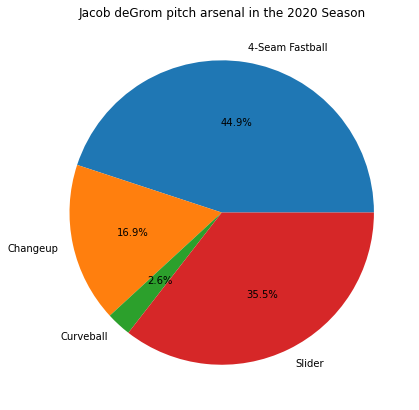

In [4]:
name = str(pitcher_data.iloc[0,5])
pitches = pitcher_data.groupby("pitch_name", as_index=False)['inning'].count()
indexes = pitches['pitch_name']
pct = np.array(pitches['inning'])
pct = pct/np.sum(pct)
plt.figure(figsize=(15,7))
plt.title(name + " pitch arsenal in the 2020 Season")
plt.pie(pct, labels=indexes, autopct='%1.1f%%',)

#### Creating Numpy Arrays so we can alter our dataframe

In [5]:
pitch_types = pitcher_data['pitch_type'].to_numpy()
stances = pitcher_data['stand'].to_numpy()
inning_topbot = pitcher_data['inning_topbot'].to_numpy()
home_score = pitcher_data['home_score'].to_numpy()
away_score = pitcher_data['away_score'].to_numpy()
first_base = pitcher_data['on_1b'].to_numpy()
second_base = pitcher_data['on_2b'].to_numpy()
third_base = pitcher_data['on_3b'].to_numpy()

#### Creates a dictionary of each pitch, and the stances of the batter, so we can have numerical values instead of strings as inputs and outputs

FF - Four Seam,
FC - Cutter,
SI - Sinker,
CH - Changeup,
FS - Split-Finger,
SL - Slider,
CU - Curveball,
KC - Knuckle Curve,
CS - Slow Curve,
KN - Knuckleball

#### For this project, commented out is each pitch getting its own unique numerical value, feel free to uncomment out. However pitches that are fastballs (four-seam, cutter, sinker) are given values of 1, and all off-spead pitches are given a value of 2. The models that I tested was to predict if the pitcher will throw a fastball or offspead pitch.

In [6]:
#pitches = {'FF': 1, 'FC':2, 'SI':3, 'CH': 4, 'FS':5, 'SL':6, 'CU':7, 'KC':8, 'CS':9, 'KN':10}
pitches = {'FF': 1, 'FC':1, 'SI':1, 'CH': 2, 'FS':2, 'SL':2, 'CU':2, 'KC':2, 'CS':2, 'KN':2}

#### Dictionary is created for the batter's stance as well. Given value of 0 if hitting lefty, and value of 1 if hitting righty.

In [7]:
stance = {'L': 0, 'R': 1}

#### Assigns a numerical value to the type of pitch, as well as the stance the batter is hitting, based upon the value in the dictionary

In [8]:
for i in range(len(pitch_types)):
    if(pitch_types[i] in pitches):
        pitch_types[i] = pitches[pitch_types[i]]
    
for i in range(len(stances)):
    if(stances[i] in stances):
        stances[i] = stance[stances[i]]

#### Code to determine whether the pitcher is pitching at home or away, based upon the "inning_topbot" column, assigns a 1 to a new array if pitching at home, and a 0 if pitching on the road. Also creates arrays to store the value of the team score, and the opponent's score

In [9]:
team_score = []
opp_score = []
home = []
for i in range (len(inning_topbot)):
    if(inning_topbot[i]=='Top'):
        team_score.append(home_score[i])
        opp_score.append(away_score[i])
        home.append(1)
    else:
        team_score.append(away_score[i])
        opp_score.append(home_score[i])
        home.append(0)

#### Instead of having a player_id be the value if a runner is on base, a value of 1 is assigned if there is a runner on a base, and a 0 if the base is empty

In [10]:
for i in range(len(first_base)):
    if(np.isnan(first_base[i])):
        first_base[i] = 0
    else:
        first_base[i] = 1
    if(np.isnan(second_base[i])):
        second_base[i] = 0
    else:
        second_base[i] = 1
    if(np.isnan(third_base[i])):
        third_base[i] = 0
    else:
        third_base[i] = 1   

#### Adds new columns to the dataframe based upon the arrays created

In [11]:
pitcher_data['pitch_type'] = pitch_types
pitcher_data['stand'] = stances
pitcher_data['team_score'] = team_score
pitcher_data['opponent_score'] = opp_score
pitcher_data['home_team'] = home
pitcher_data['on_1b'] = first_base
pitcher_data['on_2b'] = second_base
pitcher_data['on_3b'] = third_base

#### Adds another new column to the dataframe, which is the difference in the score. Will be positive if pitcher's team is winning, and negative if losing.

In [12]:
pitcher_data['score_diff'] = pitcher_data['team_score'] - pitcher_data['opponent_score']

#### Code to add a new column to dataframe that is the type of pitch thrown before. Each pitch is given a numerical value, corresponding to the key in the pitches dictionary. If the pitch is the first of the at-bat, it is assigned a value of 0, otherwise it is assigned the value of the previous pitch thrown in the at-bat.

In [13]:
prev_pitch = pitcher_data['pitch_type'].to_numpy()
pitch_num = pitcher_data['pitch_number'].to_numpy()
prev_pitch = np.flip(prev_pitch)
pitch_num = np.flip(pitch_num)

prior_pitches = [0]

for i in range(1, len(pitch_num)):
    if(pitch_num[i] == 1):
        prior_pitches.append(0)
    else:
        prior_pitches.append(prev_pitch[i-1])

prior_pitches = np.flip(prior_pitches)
pitcher_data['prior_pitch'] = prior_pitches

#### Code to add a new column to the dataframe that is the result of the previous pitch of the at-bat. If the pitch is the first of the at-bat, it is assigned a value of 0, otherwise it is assigned a value of 1 if the previous pitch resulted in a ball, and a value of 2 if the previous pitch resulted in a strike, or foul ball.

In [14]:
prev_pitch_result = pitcher_data['description'].to_numpy()
prev_pitch_result = np.flip(prev_pitch_result)

prev_results = [0]
for i in range(1, len(pitch_num)):
    if(pitch_num[i] == 1):
        prev_results.append(0)
    else:
        if('ball' in prev_pitch_result[i-1] or (prev_pitch_result[i-1]=='pitchout')):
            prev_results.append(1)
        elif(('strike' in prev_pitch_result[i-1]) or ('foul' in prev_pitch_result[i-1]) or prev_pitch_result[i-1] == 'missed_bunt'):
            prev_results.append(2)
        else:
            print(prev_pitch_result[i-1])

prev_results = np.flip(prev_results)
pitcher_data['prior_pitch_result'] = prev_results

#### Creates a new dataframe from the original, that consists of only the columns that we will use in our analysis. The values from the column "pitch_type" will be the output, and the values from all other columns will serve as the inputs

In [15]:
df = pitcher_data[['home_team','stand', 'pitch_number', 'balls', 'strikes', 'outs_when_up', 'inning', 'on_1b', 'on_2b', 'on_3b', 'score_diff', 'prior_pitch', 'prior_pitch_result', 'pitch_type']]

In [16]:
df

,home_team,stand,pitch_number,balls,strikes,outs_when_up,inning,on_1b,on_2b,on_3b,score_diff,prior_pitch,prior_pitch_result,pitch_type
0,0,0,10,2,2,2,5,0.0,1.0,0.0,0,1,2,2
1,0,0,9,2,2,2,5,0.0,1.0,0.0,0,2,2,1
2,0,0,8,2,2,2,5,0.0,1.0,0.0,0,2,1,2
3,0,0,7,1,2,2,5,0.0,1.0,0.0,0,2,2,2
4,0,0,6,1,2,2,5,0.0,1.0,0.0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,1,5,1,2,0,1,0.0,0.0,0.0,0,1,2,1
1131,1,1,4,1,2,0,1,0.0,0.0,0.0,0,1,1,1
1132,1,1,3,0,2,0,1,0.0,0.0,0.0,0,1,2,1
1133,1,1,2,0,1,0,1,0.0,0.0,0.0,0,1,2,1


#### The dataframe X is the input columns and the dataframe y is the output column.

In [17]:
X = np.array(df[['home_team', 'stand', 'pitch_number', 'balls', 'strikes', 'outs_when_up', 'inning', 'on_1b', 'on_2b', 'on_3b', 'score_diff', 'prior_pitch', 'prior_pitch_result']])

In [18]:
y = np.array(df[['pitch_type']])
y = y.reshape(y.shape[0], )
y=y.astype('int')

#### Creates a 75-25 train-test-split on all of the data that we have. We will train our models with x_train and y_train, and will test them on x_test, and see how accurate the models were by comparing the results to y_test.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree Model

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = clf.predict(x_test)

In [23]:
acc = metrics.accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Model is", acc)

The Accuracy of the Decision Tree Model is 0.5704225352112676


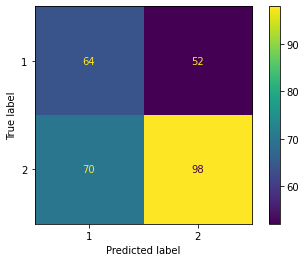

In [24]:
plot_confusion_matrix(clf, x_test, y_test) 

# Neural Network Model

In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4,
                    hidden_layer_sizes=(30), max_iter = 10000, activation = "relu")
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=30, max_iter=10000)

In [26]:
y_pred = clf.predict(x_test)

In [40]:
probs = clf.predict_proba(x_test)
probs[:6]

array([[0.63707551, 0.36292449],
       [0.08472258, 0.91527742],
       [0.1359056 , 0.8640944 ],
       [0.89086468, 0.10913532],
       [0.58484116, 0.41515884],
       [0.92055759, 0.07944241]])

In [28]:
acc = metrics.accuracy_score(y_test, y_pred)
print("The Accuracy of the Neural Network Model is", acc)

The Accuracy of the Neural Network Model is 0.6443661971830986


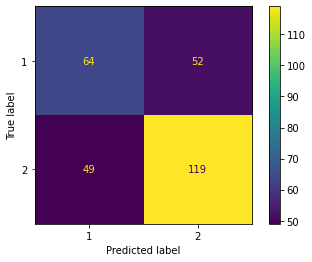

In [29]:
plot_confusion_matrix(clf, x_test, y_test) 

# Random Forest Model

In [30]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [31]:
acc = metrics.accuracy_score(y_test, y_pred)
print("The Accuracy of the Random Forest Model is", acc)

The Accuracy of the Random Forest Model is 0.6197183098591549


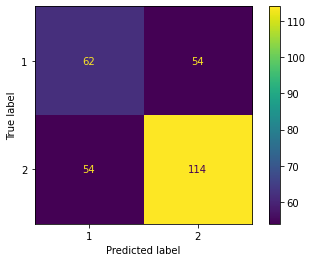

In [32]:
plot_confusion_matrix(clf, x_test, y_test) 

In [39]:
#from sklearn.ensemble import decision_path
probs = clf.predict_proba(x_test)
probs[:6]

array([[0.63707551, 0.36292449],
       [0.08472258, 0.91527742],
       [0.1359056 , 0.8640944 ],
       [0.89086468, 0.10913532],
       [0.58484116, 0.41515884],
       [0.92055759, 0.07944241]])

# Gradient Boosting Model

In [34]:
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [38]:
probs = clf.predict_proba(x_test)
probs[:6]

array([[0.63707551, 0.36292449],
       [0.08472258, 0.91527742],
       [0.1359056 , 0.8640944 ],
       [0.89086468, 0.10913532],
       [0.58484116, 0.41515884],
       [0.92055759, 0.07944241]])

In [36]:
acc = metrics.accuracy_score(y_test, y_pred)
print("The Accuracy of the Gradient Boosting Model is", acc)

The Accuracy of the Gradient Boosting Model is 0.6549295774647887


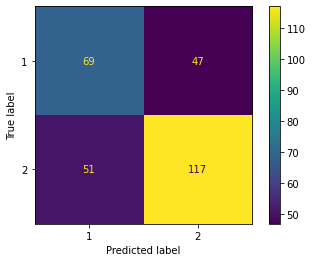

In [37]:
plot_confusion_matrix(clf, x_test, y_test) 